In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
boc = BrainObservatoryCache()

# Visual stimuli

As we saw in the [overview](vc2p-dataset.md), there were a range of visual stimuli presented to the mice in these experiments.

In [3]:
boc.get_all_stimuli()

['drifting_gratings',
 'locally_sparse_noise',
 'locally_sparse_noise_4deg',
 'locally_sparse_noise_8deg',
 'natural_movie_one',
 'natural_movie_three',
 'natural_movie_two',
 'natural_scenes',
 'spontaneous',
 'static_gratings']

Here we will look at each stimulus, and what information we have about its presentation.

## Drifting gratings

The drifting gratings stimulus consists of a sinusoidal grating that is presented on the monitor that moves orthogonal to the orientation of the grating, moving in one of 8 directions (called <b>orientation</b>) and at one of 5 <b>temporal frequencies</b>. The directions are specified in units of degrees and temporal frequency in Hz. The grating has a spatial frequency of 0.04 cycles per degree and a contrast of 80%.
Each trial is presented for 2 seconds with 1 second of mean luminance gray in between trials.

Let's find the session in the experiment container we're exploring that contains the drifting gratings stimulus.

In [4]:
experiment_container_id = 511510736
session_id = boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id], stimuli=['drifting_gratings'])[0]['id']
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)

Let's look at the stimulus table for the drifting gratings stimulus

In [5]:
drifting_gratings_table = data_set.get_stimulus_table('drifting_gratings')
drifting_gratings_table.head(n=10)

,temporal_frequency,orientation,blank_sweep,start,end
0,8.0,270.0,0.0,747,807
1,2.0,135.0,0.0,837,897
2,2.0,315.0,0.0,927,987
3,15.0,315.0,0.0,1018,1077
4,1.0,270.0,0.0,1108,1168
5,15.0,315.0,0.0,1198,1258
6,1.0,315.0,0.0,1289,1348
7,15.0,180.0,0.0,1379,1439
8,2.0,135.0,0.0,1469,1529
9,NaN,NaN,1.0,1560,1619


The <b>start</b> and <b>end</b> columns provide the 2p imaging frame during which the trials starts and ends, respectively. This indexes directly into the activity traces (e.g. dff or event traces, see [link to section](vc2p-session-data.md)). The <b>orientation</b> and <b>temporal_frequency</b> columns provide the stimulus conditions of the trial. The trials where these are both Nan are <b>blank sweeps</b> during which no grating is presented and the monitor remains at mean luminance gray.

What are the orientation and temporal frequency values used in this stimulus?

In [6]:
orivals = drifting_gratings_table.orientation.dropna().unique()
print("orientations: ", np.sort(orivals))
tfvals = drifting_gratings_table.temporal_frequency.dropna().unique()
print("temporal frequencies: ", np.sort(tfvals))

orientations:  [  0.  45.  90. 135. 180. 225. 270. 315.]
temporal frequencies:  [ 1.  2.  4.  8. 15.]


How many blank sweep trials are there?

In [7]:
len(drifting_gratings_table[np.isnan(drifting_gratings_table.orientation)])

30

How many trials are there for any one stimulus condition?

In [8]:
ori=45
tf=2
len(drifting_gratings_table[(drifting_gratings_table.orientation==ori)&(drifting_gratings_table.temporal_frequency==2)])

15

What is the duration of a trial? Let's plot the first 50 trials

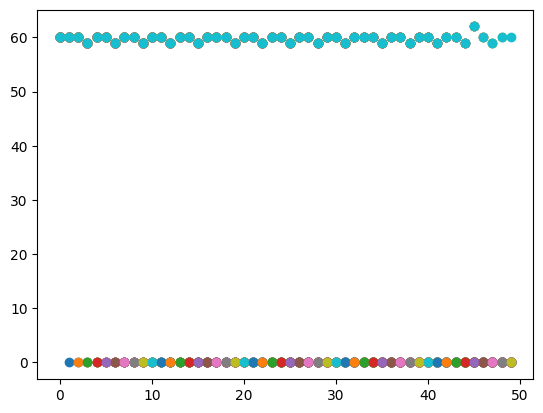

In [9]:
durations = np.empty((50))
for i in range(50):
  durations[i] = drifting_gratings_table.end[i] - drifting_gratings_table.start[i]
  plt.plot(durations, 'o')

Most trials have a duration of 60 imaging frames. As the two photon microscope we use has a frame rate of 30Hz this is 2 seconds. But you can see that there is some jitter between trials as to the precise duration.

What is the inter trial interval?

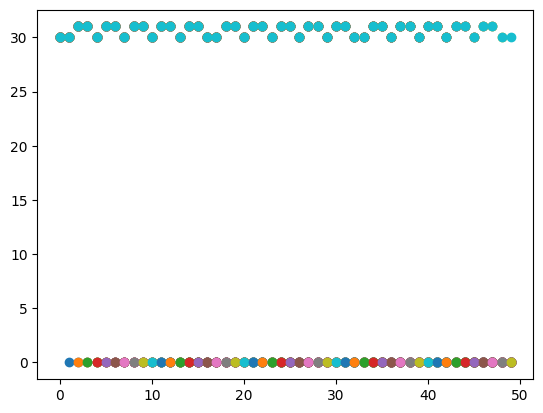

In [10]:
intervals = np.empty((50))
for i in range(50):
  intervals[i] = drifting_gratings_table.start[i+1] - drifting_gratings_table.end[i]
  plt.plot(intervals, 'o')

## Static gratings

The static gratings stimulus consists of a <b>stationary</b> sinusoidal grating that is flasshed on the monitor at one of 6 <b>orientations</b>, one of 5 <b>spatial frequencies</b>, and one of 4 <b>phases</b>. The grating has a contrast of 80%.
Each trial is presented for 0.25 seconds and followed immediately by the next trial without any intertrial interval. There are blanksweeps, where the grating is replaced by the mean luminance gray, interleaved in among the trials.

Let's find the session in the experiment container we're exploring that contains the static gratings stimulus.

In [11]:
experiment_container_id = 511510736
session_id = boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id], stimuli=['static_gratings'])[0]['id']
print(session_id)
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)

501559087


Let's look at the stimulus table for the static gratings stimulus

In [12]:
static_gratings_table = data_set.get_stimulus_table('static_gratings')
static_gratings_table.head(n=10)

,orientation,spatial_frequency,phase,start,end
0,90.0,0.04,0.50,747,754
1,150.0,0.04,0.50,754,761
2,30.0,0.02,0.00,762,769
3,0.0,0.32,0.50,769,776
4,150.0,0.16,0.75,777,784
5,150.0,0.08,0.25,784,791
6,90.0,0.32,0.50,792,799
7,60.0,0.04,0.25,799,806
8,30.0,0.08,0.75,807,814
9,90.0,0.32,0.50,814,821


What are the orientation, spatial frequency, and phase values used in this stimulus?

In [13]:
print("orientations: ", np.sort(static_gratings_table.orientation.dropna().unique()))
print("spatial frequencies: ", np.sort(static_gratings_table.spatial_frequency.dropna().unique()))
print("phases: ", np.sort(static_gratings_table.phase.dropna().unique()))

orientations:  [  0.  30.  60.  90. 120. 150.]
spatial frequencies:  [0.02 0.04 0.08 0.16 0.32]
phases:  [0.   0.25 0.5  0.75]


How many blank sweep trials are there?

In [14]:
len(static_gratings_table[np.isnan(static_gratings_table.orientation)])

192

How many trials are there of any one stimulus codition?

In [15]:
ori=30
sf=0.04
phase=0.0
len(static_gratings_table[(static_gratings_table.orientation==ori)&(static_gratings_table.spatial_frequency==sf)&(static_gratings_table.phase==phase)])

49

```{note} 
There are roughly 50 trials fo each stimulus condition, but not precisely. Some conditions have fewer than 50 trials but none have more than 50 trials.
```

What is the duration of a trial? Let's plot the first 50 trials

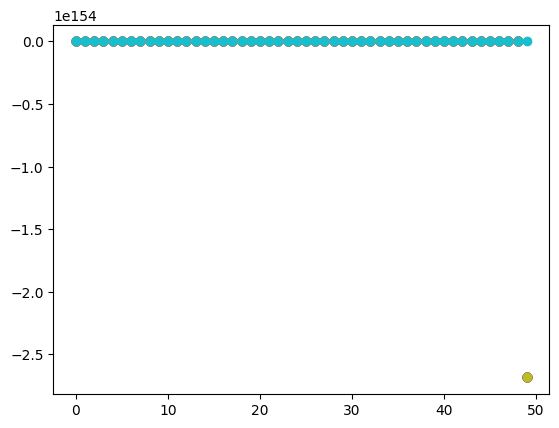

In [16]:
durations = np.empty((50))
for i in range(50):
  durations[i] = static_gratings_table.end[i] - static_gratings_table.start[i]
  plt.plot(durations, 'o')

What is the inter trial interval?

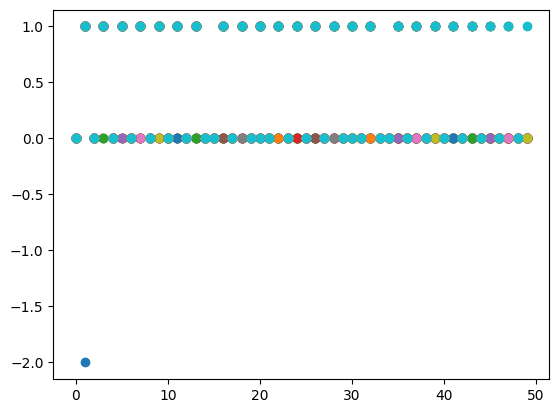

In [17]:
intervals = np.empty((50))
for i in range(50):
  intervals[i] = static_gratings_table.start[i+1] - static_gratings_table.end[i]
  plt.plot(intervals, 'o')

## Natural scenes

The natural scenes stimulus consists of a 118 black and whiteimages that are flashed on the monitor. Each trial is presented for 0.25 seconds and followed immediately by the next trial without any intertrial interval. There are blanksweeps, where the images are replaced by the mean luminance gray, interleaved in among the trials.
The images are taken from three different image sets including CITATIONS HERE

Let's find the session in the experiment container we're exploring that contains the natural scenes stimulus.

In [18]:
experiment_container_id = 511510736
session_id = boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id], stimuli=['natural_scenes'])[0]['id']
print(session_id)
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)

501559087


Let's look at the stimulus table for the natural scenes stimulus

In [19]:
natural_scenes_table = data_set.get_stimulus_table('natural_scenes')
natural_scenes_table.head(n=10)

,frame,start,end
0,81,16100,16107
1,33,16108,16115
2,76,16115,16122
3,13,16123,16130
4,56,16130,16137
5,30,16138,16145
6,44,16145,16152
7,93,16153,16160
8,65,16160,16167
9,60,16168,16175


Unlike the gratings stimuli, there are no stimulus parameters here. Instead there is a <b>frame</b> value that identifies which image was presented for each trial. This frame number indexes into the <b>stimulus template</b>. 

```{note} 
The blanksweeps in the natural scene stimulus table are identified by having a frame value of <b>-1</b>
```

How many blank sweep trials are there?

In [20]:
len(natural_scenes_table[natural_scenes_table.frame==-1])

50

How many trials are there of any one image?

In [21]:
len(natural_scenes_table[natural_scenes_table.frame==22])

50

### Stimulus template
The stimulus template is an array that contains the images that were presented to the mouse. This can be accessed using <b>get_stimulus_template</b>.

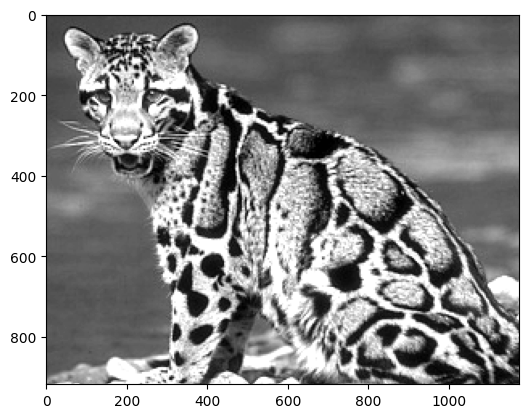

In [22]:
natural_scene_template = data_set.get_stimulus_template('natural_scenes')
scene_number=22
plt.imshow(natural_scene_template[scene_number,:,:], cmap='gray')

## Natural movies

## Locally sparse noise

## Spontaneous activity